<a href="https://colab.research.google.com/github/DaffaPoseidon/PythonJobsheet5Semester4/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#In [1-spam Filtering]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving sms.csv to sms (3).csv


In [43]:
import pandas as pd
import io

df = pd.read_csv('/content/sms.csv', delimiter=',', header = None)
print ("Out")
print (df.head())

Out
       0                                                  1
0  label                                            message
1      0  Go until jurong point, crazy.. Available only ...
2      0                      Ok lar... Joking wif u oni...
3      1  Free entry in 2 a wkly comp to win FA Cup fina...
4      0  U dun say so early hor... U c already then say...


In [45]:
#In [3-LogRes Spam Filtering]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

X = df[1].values
y = df[0].values

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print('Out [3-LogRes Spam Filtering]:\n')
for i, prediction in enumerate(predictions[:10]):
  print('%i\tPredicted: %s, message: %s' % (i+1, prediction, X_test_raw[i]))


Out [3-LogRes Spam Filtering]:

1	Predicted: 0, message: I cant pick the phone right now. Pls send a message
2	Predicted: 0, message: Hi Princess! Thank you for the pics. You are very pretty. How are you?
3	Predicted: 0, message: Ok lor...
4	Predicted: 1, message: You have been selected to stay in 1 of 250 top British hotels - FOR NOTHING! Holiday Worth £350! To Claim, Call London 02072069400. Bx 526, SW73SS
5	Predicted: 0, message: Alright, we're all set here, text the man
6	Predicted: 0, message: Well imma definitely need to restock before thanksgiving, I'll let you know when I'm out
7	Predicted: 0, message: Was doing my test earlier. I appreciate you. Will call you tomorrow.
8	Predicted: 0, message: Same here, but I consider walls and bunkers and shit important just because I never play on peaceful but I guess your place is high enough that it don't matter
9	Predicted: 0, message: No need lar i go engin? Cos my sis at arts today...
10	Predicted: 0, message: Also remember the beads d

Out [4-Confsuion Matrix Spam Filtering]:

[[4 1]
 [2 3]] 



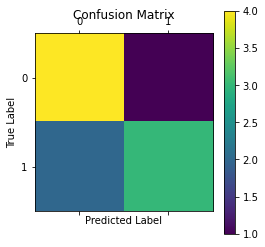

In [46]:
#In [4-Confusion Matrix Spam Filtering]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

confusion_matrix = confusion_matrix(y_test, y_pred)

print('Out [4-Confsuion Matrix Spam Filtering]:\n')
print(confusion_matrix, '\n')
plt.matshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [1]:
#In [5-Accuracy Spam Filtering]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('sms.csv', delimiter = '\t', header = None)

#X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'], random_state = 11)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[0], df[0])

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

scores = cross_val_score(classifier, X_train, y_train, cv = 5)

print('#Out [5-Accuracy Spam Filtering]:\n')
print('Accuracies: %s' % scores)
print('Mean Accuracy: %s' % np.mean(scores))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


#Out [5-Accuracy Spam Filtering]:

Accuracies: [0.03106332 0.02990431 0.03229665 0.02990431 0.02751196]
Mean Accuracy: 0.03013610925325696


In [2]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving sms.txt to sms (4).txt


In [6]:
# In [6-Precision, Recall, F1 Score Spam Filtering]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(y_train)

df2 = pd.read_csv('sms.txt', delimiter = '\t', header = None)
print(df2.head())

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df2[1], df2[0])

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

precisions = cross_val_score(classifier, X_train, y_train, cv = 5, scoring = 'precision')
recalls = cross_val_score(classifier, X_train, y_train, cv = 5, scoring = 'recall')
f1_score = cross_val_score(classifier, X_train, y_train, cv = 5, scoring = 'f1')

print('\n\n# Out[6-Precision, Recall, F1 Score Spam Filtering]: \n')
print('Precision: %s' % np.mean(precisions))
print('Recall: %s' % np.mean(recalls))
print('F1 Score: %s' % np.mean(f1_score))
print('F1 Score: %s' % f1_score)

       0                                                  1
0  label                                            message
1      0  Go until jurong point, crazy.. Available only ...
2      0                      Ok lar... Joking wif u oni...
3      1  Free entry in 2 a wkly comp to win FA Cup fina...
4      0  U dun say so early hor... U c already then say...


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


ValueError: ignored

In [4]:
# In [7-AUC Curve Spam Filtering]:

predictions = classifier.predict_proba(X_test)

print('Ham Proba       Spam Proba')
print(predictions[:10])
print(X_test_raw[:10])
print(y_test[:10]) #1-spam, 0-ham

flase_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)

print('\n# Out [7-AUC Curve Spam Filtering]:\n')
plt.title("Receiver Operating Characteristics")
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Fall Out")
plt.ylabel("Sensitivity --OR-- Recall")
plt.show()


Ham Proba       Spam Proba
[[9.68539503e-01 3.12555714e-02 2.04925967e-04]
 [9.26884931e-01 7.28060182e-02 3.09050420e-04]
 [9.78736826e-01 2.10942488e-02 1.68925144e-04]
 [9.83406113e-01 1.64458641e-02 1.48022638e-04]
 [9.95449527e-01 4.47423171e-03 7.62414110e-05]
 [9.35973591e-01 6.37320568e-02 2.94351787e-04]
 [9.93523423e-01 6.38306799e-03 9.35093066e-05]
 [5.46160917e-01 4.53248310e-01 5.90772825e-04]
 [9.78506591e-01 2.13195974e-02 1.73811387e-04]
 [4.04689422e-01 5.94726162e-01 5.84415699e-04]]
3174    Do u still have plumbers tape and a wrench we ...
2840    Were trying to find a Chinese food place aroun...
3164    I can't describe how lucky you are that I'm ac...
4029        Yes, princess. Are you going to make me moan?
3456    I dont have any of your file in my bag..i was ...
2319    Waqt se pehle or naseeb se zyada kisi ko kuch ...
4727    There'll be a minor shindig at my place later ...
334     Call Germany for only 1 pence per minute! Call...
3915                        

ValueError: ignored

In [7]:
parameters = {
    'vectorizer_max_df': (0.25, 0.5, 0.75),
    'vectorizer_stop_words': ('english', None),
    'vectorizer_max_features': (2500, 5000, 10000, None),
    'vectorizer_ngram_range':((1,1),(1,2)),
    'vectorizer_use_idf': (True, False),
    'vectorizer_norm': ('l1', 'l2'),
    'classifier_penalty': ('l1', 'l2'),
    'classifier_C': (0.01, 0.1, 1, 10),
}

df = pd.read_csv('sms.csv', delimiter = ',', header = None)
X = df[1].values
y = df[0].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y)

grid_search = GridSearchCV(pipeline, parameters, n_jobs = -1, verbose = 1, scoring = 'accuracy', cv = 3)
grid_search.fit(X_train, y_train)

print('\n# [8-Grid Search Spam Filtering]:\n')
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set: ')
best_parameters = grid_search.best_eestimator_.getparams()
for param_name in sorted(parameters.key()):
#for param_name in sorted(best_parameters.keys()):
  print('\t%s: %r', (param_name, best_parameters[param_name]))

predictions = grid_search.predict(x_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions))
print('Recall:', recall_score(y_test, predictions))


NameError: ignored